# Week 5 - Networks IV, Advanced measures

## Visualize the house of representatives network

In [1]:
import networkx as nx
import io
import pandas as pd
import re

# Democratic color #3333FF 
# Republican color #ff0000

pathFolder = 'politicians/113/'
df = pd.read_csv('HouseRepresentatives/H113.csv', encoding='utf-8')

G = nx.DiGraph()

for index, row in df.iterrows():
    
    name = row.WikiPageName
    party = row.Party
    state = row.State
    
    try :
        file = io.open(pathFolder + name + '.json', 'r', encoding='utf-8')
        
        data = file.read()
        
        file.close()
        
        links = re.findall('\[\[(.*?)\]\]', data)
        
        for result in links: 
            result = result.replace(' ', '_')
            
            for checkName in df.WikiPageName:
                if checkName in result:
                    
                    if name not in G:
                        G.add_node(name)
                    
                    G.node[name]['Party'] = party
                    G.node[name]['State'] = state
                    
                    if party == 'Democratic':
                        G.node[name]['color'] = '#3333FF'
                    
                    if party == 'Republican':
                        G.node[name]['color'] = '#FF0000'
                        
                    G.add_edge(name, checkName)
    except :
        print('Error while loading page : {}\n'.format(name))

Error while loading page : José_E._Serrano

Error while loading page : Luis_Gutiérrez

Error while loading page : Nydia_Velázquez

Error while loading page : Rubén_Hinojosa

Error while loading page : Mario_Díaz-Balart

Error while loading page : Raúl_Grijalva

Error while loading page : Linda_Sánchez

Error while loading page : André_Carson

Error while loading page : Ben_Ray_Luján

Error while loading page : Raúl_Labrador

Error while loading page : Tony_Cárdenas

Error while loading page : Joaquín_Castro



In [2]:
nx.draw_spring(G, with_labels=True, font_color="Black", k = 2, node_size=200)

D:\Programs\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Programs\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


In [3]:
# Color and size sorting

degree = nx.degree(G)
color_map = []

color_attributes = nx.get_node_attributes(G, 'color')

for node in nx.get_node_attributes(G, 'color'):
    color_map.append(color_attributes[node])
    
for i in range(0, len(G.nodes()) - len(color_map)):
    color_map.append('#000000')

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.81it/s]


BarnesHut Approximation  took  2.86  seconds
Repulsion forces  took  19.94  seconds
Gravitational forces  took  0.12  seconds
Attraction forces  took  0.09  seconds
AdjustSpeedAndApplyForces step  took  0.48  seconds


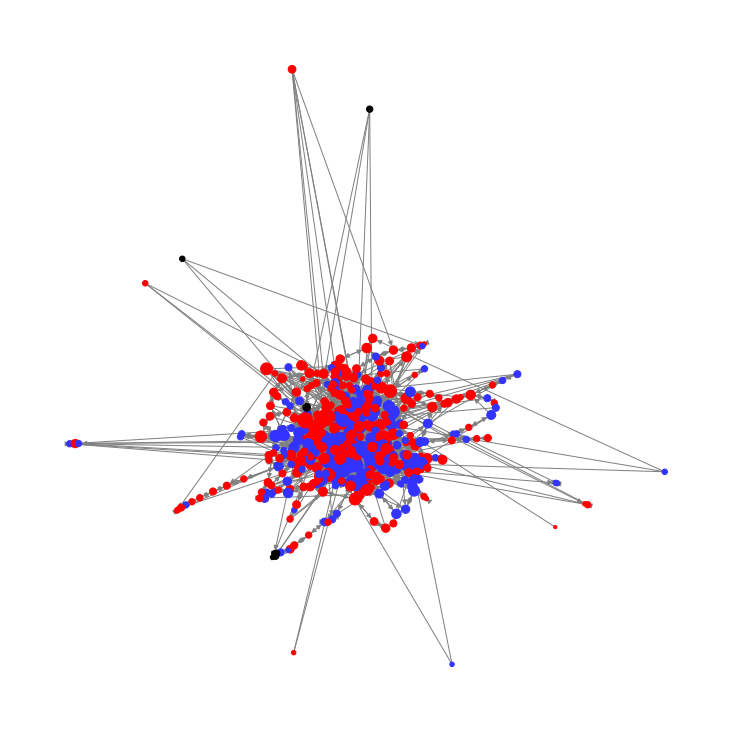

In [4]:
# With forceatlas2

from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

forceatlas2 = ForceAtlas2(
                        outboundAttractionDistribution=True,
                        linLogMode=False,
                        adjustSizes=False,
                        edgeWeightInfluence=2.0,
                        jitterTolerance=0.1,
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,
                        scalingRatio=0.5,
                        strongGravityMode=False,
                        gravity=0,
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

plt.figure(1, figsize=(10, 10))
nx.draw(G, positions, node_size=[v[1] * 10 for v in degree], node_color=color_map, edge_color="grey", k = 10)
plt.axis('off')
plt.show()

Both graphs represent different interactions in politics. 
The first one (ploted above) does not express an opinion, therefor is not focused on one main idea which could be relayed and enforced by other sources of the same party.
Here it's just about refering who working with or against whom.

In [5]:
maxDegree = 0
name = None

for degree in G.out_degree:
    if degree[1] > maxDegree:
        maxDegree = degree[1]
        name = degree[0]
        
print("{} {}".format(maxDegree, name))

22 Michele_Bachmann


In [6]:
for n in G.neighbors(name):
    print(n)

Michele_Bachmann
Tim_Walz
Betty_McCollum
Keith_Ellison
Collin_Peterson
Patrick_McHenry
Lynn_Westmoreland
John_Mica
Ted_Poe
Paul_Ryan
Eric_Cantor
Jeb_Hensarling
John_Boehner
Steve_King
John_Kline_(politician)
Louie_Gohmert
Erik_Paulsen
Darrell_Issa
Spencer_Bachus
Jan_Schakowsky
Steve_Pearce_(politician)
Gus_Bilirakis


Mainly coworkers or opponents

The plotted graph works by linking to opponents or other people from someone's party. As explained earlier, it's because the aim of those page is to describe someone's history and, particularly in this case, professional evolution.

## The structure of the house of representatives network

Exercise 4

A directed graph is important because you can mention someone in an article without this person notifying or caring enough about it to put it on their page.

For example, when Kennedy escaped from the White House, a lot of people could call him out for it, which could be mentioned on their respective page.
On the other hand, it will not be mentioned on Kennedy's page because it would be too many people to keep track of.

Using an undirected graph would not have made sense here.

In [7]:
print("# of nodes : {}".format(len(G.nodes())))
print("# of edges : {}".format(G.number_of_edges()))
print("Density : {}".format(nx.density(G)))

# of nodes : 431
# of edges : 1659
Density : 0.008951599848918145


In [26]:
unsorted_in_degrees = []
totalInDegree = 0

for degree in G.in_degree:
    unsorted_in_degrees.append(degree[1])
    totalInDegree += degree[1]
    
in_degrees = sorted(unsorted_in_degrees)

print("Average degree : {}".format(totalInDegree/len(G.in_degree)))
print("Median degree : {}".format(in_degrees[round(len(in_degrees)/2)]))
print("Minimum degree : {}".format(in_degrees[0]))
print("Maximum degree : {}".format(in_degrees[len(in_degrees) - 1]))

Average degree : 3.8491879350348026
Median degree : 3
Minimum degree : 0
Maximum degree : 59


In [27]:
unsorted_out_degrees = []
totalOutDegree = 0

for degree in G.out_degree:
    unsorted_out_degrees.append(degree[1])
    totalOutDegree += degree[1]
    
out_degrees = sorted(unsorted_out_degrees)

print("Average degree : {}".format(totalOutDegree/len(G.out_degree)))
print("Median degree : {}".format(out_degrees[round(len(out_degrees)/2)]))
print("Minimum degree : {}".format(out_degrees[0]))
print("Maximum degree : {}".format(out_degrees[len(out_degrees) - 1]))

Average degree : 3.8491879350348026
Median degree : 3
Minimum degree : 0
Maximum degree : 22


A lot of representatives do not have a lot of relation to each other, probably because they are from smaller towns or have a smaller carrier.
Maximums are so different from the average because some representatives might have had a bigger political carrier (like by running for other, more "interesting", posts)

In [10]:
sorted_out_degrees = sorted(G.out_degree, key=lambda x: x[1], reverse=True)
sorted_in_degrees = sorted(G.in_degree, key=lambda x: x[1], reverse=True)

print("Top 5 out")
for politician in sorted_out_degrees[0:5]:
    print("{} \t {} \t {}".format(politician[0], G.nodes[politician[0]]['Party'],G.nodes[politician[0]]['State']))
    
print("\nTop 5 in")
for politician in sorted_in_degrees[0:5]:
    print("{} \t {} \t {}".format(politician[0], G.nodes[politician[0]]['Party'],G.nodes[politician[0]]['State']))

Top 5 out
Michele_Bachmann 	 Republican 	 Minnesota
Devin_Nunes 	 Republican 	 California
Tom_Rooney_(Florida_politician) 	 Republican 	 Florida
Brad_Sherman 	 Democratic 	 California
Keith_Ellison 	 Democratic 	 Minnesota

Top 5 in
John_Boehner 	 Republican 	 Ohio
Nancy_Pelosi 	 Democratic 	 California
Paul_Ryan 	 Republican 	 Wisconsin
Eric_Cantor 	 Republican 	 Virginia
Steny_Hoyer 	 Democratic 	 Maryland


John Boehner : Speaker of the House
Nancy Pelosi : Minority Leader
Paul Ryan : Budget
Eric Cantor : Majority Leader
Steny Hoyer : Minority Whip

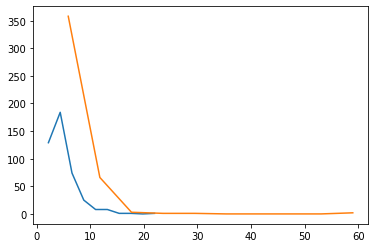

In [11]:
import numpy as np

histoOut, binOut = np.histogram(out_degrees)
histoIn, binIn = np.histogram(in_degrees)

plt.plot(binOut[1:len(binOut)], histoOut)
plt.plot(binIn[1:len(binIn)], histoIn)

The most common degree is 3 on each side

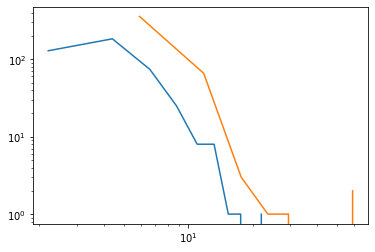

In [12]:
plt.plot(binOut[1:len(binOut)], histoOut)
plt.plot(binIn[1:len(binIn)], histoIn)

plt.xscale('log')
plt.yscale('log')

plt.show()

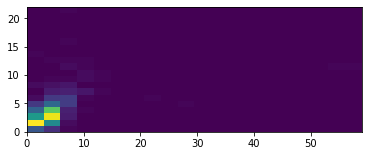

In [38]:
heatmap, xedges, yedges = np.histogram2d(unsorted_in_degrees, unsorted_out_degrees, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

A heatmap allows us to see the correlation between having a lot of in relations and out relations.

In [13]:
Exercise 5

# Create an undirected version

Gu = G.to_undirected()

In [14]:
import operator

betweenness = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness.items(), key=operator.itemgetter(1), reverse=True)

sorted_betweenness[0:5]

[('John_Boehner', 0.18956970779760135),
 ('Nancy_Pelosi', 0.1749006108482465),
 ('Justin_Amash', 0.0786352481875929),
 ('Kevin_McCarthy_(California_politician)', 0.06080466776428467),
 ('Henry_Waxman', 0.057916498180873376)]

In [15]:
eigenvector = nx.eigenvector_centrality(G)
sorted_eigenvector = sorted(eigenvector.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_eigenvector[0: 5])

[('Nancy_Pelosi', 0.46624567317032706), ('John_Boehner', 0.4251296379886047), ('John_Dingell', 0.29704893206572813), ('Steny_Hoyer', 0.2890836418985837), ('Eric_Cantor', 0.20923603473133293)]


In [16]:
reverse_eigenvector = nx.eigenvector_centrality(G.reverse())
sorted_reverse_eigenvector = sorted(reverse_eigenvector.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_reverse_eigenvector[0:5])

[('Michele_Bachmann', 0.251601908054606), ('Keith_Ellison', 0.1968567409340435), ('Nancy_Pelosi', 0.1854775446120402), ('Charles_Rangel', 0.1797110243662844), ('Devin_Nunes', 0.16861730244145307)]


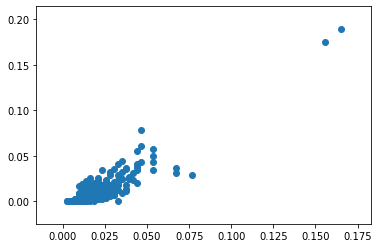

In [17]:
plt.scatter(list(nx.degree_centrality(G).values()),list(betweenness.values()))

Exercice 6

